In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
from pathlib import Path

In [2]:
base_url = 'out/exp_iciar/results/'

In [3]:
def filter_random(file):
    name = file.name
    if 'Random' in name and 'entropy' not in name:
        return True
    else:
        return False

In [4]:
def filter_coreset(file):
    name = file.name
    if 'CoreSet' in name and 'entropy' not in name:
        return True
    else:
        return False

In [5]:
def filter_bayesian(file):
    name = file.name
    if 'Bayesian' in name and 'entropy' not in name:
        return True
    else:
        return False

In [6]:
def filter_uncertainty(file):
    name = file.name
    if 'Uncertainty' in name and 'entropy' not in name:
        return True
    else:
        return False

In [7]:
all_files = list(Path(base_url).glob('*.pkl'))
random_files = list(filter(filter_random, all_files))
bayesian_files = list(filter(filter_bayesian, all_files))
coreset_files = list(filter(filter_coreset, all_files))
uncertainty_files = list(filter(filter_uncertainty, all_files))
random_files, bayesian_files, coreset_files, uncertainty_files

([PosixPath('out/exp_iciar/results/Random_iciar_400_400_0.pkl'),
  PosixPath('out/exp_iciar/results/Random_iciar_400_400_1.pkl'),
  PosixPath('out/exp_iciar/results/Random_iciar_399_400_4.pkl'),
  PosixPath('out/exp_iciar/results/Random_iciar_399_400_3.pkl'),
  PosixPath('out/exp_iciar/results/Random_iciar_400_400_2.pkl')],
 [PosixPath('out/exp_iciar/results/Bayesian_iciar_399_400_2.pkl'),
  PosixPath('out/exp_iciar/results/Bayesian_iciar_399_400_0.pkl'),
  PosixPath('out/exp_iciar/results/Bayesian_iciar_399_400_3.pkl'),
  PosixPath('out/exp_iciar/results/Bayesian_iciar_399_400_1.pkl'),
  PosixPath('out/exp_iciar/results/Bayesian_iciar_399_400_4.pkl')],
 [PosixPath('out/exp_iciar/results/CoreSet_iciar_400_400_2.pkl'),
  PosixPath('out/exp_iciar/results/CoreSet_iciar_400_400_1.pkl'),
  PosixPath('out/exp_iciar/results/CoreSet_iciar_399_400_3.pkl'),
  PosixPath('out/exp_iciar/results/CoreSet_iciar_399_400_4.pkl'),
  PosixPath('out/exp_iciar/results/CoreSet_iciar_400_400_0.pkl')],
 [])

In [8]:
random_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in random_files])
bayesian_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in bayesian_files])
coreset_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in coreset_files])
uncertainty_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in uncertainty_files])

In [9]:
random_mean = random_results.mean(axis=0)
bayesian_mean = bayesian_results.mean(axis=0)
coreset_mean = coreset_results.mean(axis=0)
unceratinty_mean = uncertainty_results.mean(axis=0)
random_mean, bayesian_mean, coreset_mean, unceratinty_mean

/home/ens/AM90950/anaconda3/envs/discri/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/home/ens/AM90950/anaconda3/envs/discri/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([0.35575   , 0.4175    , 0.453     , 0.52900001, 0.55274999,
        0.55225   , 0.58399999, 0.5775    ]),
 array([0.32575   , 0.39725   , 0.4715    , 0.53025001, 0.54175001,
        0.54875   , 0.5625    , 0.57975   ]),
 array([0.3525    , 0.39175   , 0.46225001, 0.50375   , 0.57750001,
        0.56925   , 0.58449999, 0.58149999]),
 nan)

In [12]:
range(random_mean.shape[0])

range(0, 8)

In [13]:
# labels_list = (np.asarray([1000, 2000, 3000, 4000, 5000, 6000, 7000])/7000)*100
labels_list = (np.asarray([400, 800, 1200, 1800, 2200, 2600, 3000, 3400])/3400)*100

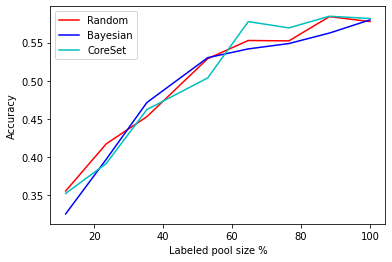

In [14]:
plt.figure()
plt.plot(labels_list, random_mean, 'r', label= 'Random')
plt.plot(labels_list, bayesian_mean, 'b', label='Bayesian')
plt.plot(labels_list, coreset_mean, 'c', label='CoreSet')
# plt.plot(labels_list, unceratinty_mean, 'g', label='Uncertainty')
plt.ylabel('Accuracy')
plt.xlabel('Labeled pool size %')
plt.legend()